# <div style = 'background-color:green'> <center><font color='white'>Tarjetas de crédito: usando Machine Learning para predecir elegibilidad</div>
---

#### En este proyecto, se realiza un análisis de clasificación sobre un conjunto de datos personales de clientes de tarjetas de crédito. El objetivo principal es desarrollar y comparar distintos modelos de Machine Learning para identificar aquellos clientes que podrían ser elegibles para recibir una tarjeta, proporcionando así información útil y confiable para la toma de decisiones comerciales.
#### Para iniciar, se cuenta con la siguiente base de datos, que contiene información relevante de los clientes, incluyendo variables como edad, ingresos, historial crediticio, familia, educación, entre otras. Estos datos servirán como punto de partida para el entrenamiento y validación de los modelos

⌧Column Name	Description

⌧ID	An identifier for each individual (customer).

⌧Gender	The gender of the individual.

⌧Own_car	A binary feature indicating whether the individual owns a car.

⌧Own_property	A binary feature indicating whether the individual owns a property.

⌧Work_phone	A binary feature indicating whether the individual has a work phone.

⌧Phone	A binary feature indicating whether the individual has a phone.

⌧Email	A binary feature indicating whether the individual has provided an email address.

⌧Unemployed	A binary feature indicating whether the individual is unemployed.

⌧Num_children	The number of children the individual has.

⌧Num_family	The total number of family members.

⌧Account_length	The length of the individual's account with a bank or financial institution.

⌧Total_income	The total income of the individual.

⌧Age	The age of the individual.

⌧Years_employed	The number of years the individual has been employed.

⌧Income_type	The type of income (e.g., employed, self-employed, etc.).

⌧Education_type	The education level of the individual.

⌧Family_status	The family status of the individual.

⌧Housing_type	The type of housing the individual lives in.

⌧Occupation_type	The type of occupation the individual is engaged in.

⌧Target	The target variable for the classification task, indicating whether the individual is eligible for a credit card or not (e.g., Yes/No, 1/0).

## <div style = 'background-color:green'> <center><font color='white'>① Analisis exploratorio de los datos (EDA) </font></div>
Se comienza con examinar la estructura del dataset y se describen las variables disponibles.  
En esta etapa se busca:
- Conocer la cantidad de registros y variables.  
- Identificar valores nulos o duplicados.  
- Revisar tipos de datos.  
- Obtener estadísticas descriptivas básicas.  
- Visualizar relaciones entre las variables mediante gráficos.

In [1]:
# Importo librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns # Librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Creditcard.csv")
df.sample(3)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
260,5010317,1,0,0,0,0,1,0,0,2,45,135000.0,25.990951,0.355928,Commercial associate,Higher education,Married,House / apartment,Cooking staff,0
4477,5067567,1,0,1,0,0,1,0,0,2,4,157500.0,25.495390,2.998008,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,0
3713,5054454,1,1,1,1,1,0,0,0,1,10,157500.0,22.746531,3.581182,Working,Secondary / secondary special,Single / not married,House / apartment,Other,0


In [3]:
# Cambio los encabezados de las columnas
headers = ["ID", "Genero", "Auto", "Inmueble", "Telefono Laboral", "Telefono", "Email", "Desempleado", "Hijos", "Familia", "Saldo", "Ingreso", "Edad", "Antigüedad", "Tipo de Ingreso", "Educacion", "Estado Civil", "Tipo de Casa", "Empleo", "Target"]
df.columns = headers

In [4]:
df.sample(3)

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Tipo de Ingreso,Educacion,Estado Civil,Tipo de Casa,Empleo,Target
8557,5135270,0,0,1,0,0,0,1,0,2,53,216000.0,63.281245,0.000000,Pensioner,Secondary / secondary special,Married,House / apartment,Other,0
3868,5058382,0,0,0,0,0,0,0,0,1,6,112500.0,25.821201,0.391521,Working,Higher education,Single / not married,House / apartment,Core staff,0
9067,5143040,0,0,0,1,0,0,0,0,1,38,135000.0,28.392096,3.789263,State servant,Higher education,Single / not married,House / apartment,Accountants,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                9709 non-null   int64  
 1   Genero            9709 non-null   int64  
 2   Auto              9709 non-null   int64  
 3   Inmueble          9709 non-null   int64  
 4   Telefono Laboral  9709 non-null   int64  
 5   Telefono          9709 non-null   int64  
 6   Email             9709 non-null   int64  
 7   Desempleado       9709 non-null   int64  
 8   Hijos             9709 non-null   int64  
 9   Familia           9709 non-null   int64  
 10  Saldo             9709 non-null   int64  
 11  Ingreso           9709 non-null   float64
 12  Edad              9709 non-null   float64
 13  Antigüedad        9709 non-null   float64
 14  Tipo de Ingreso   9709 non-null   object 
 15  Educacion         9709 non-null   object 
 16  Estado Civil      9709 non-null   object 


In [6]:
df.Genero.value_counts()

0    6323
1    3386
Name: Genero, dtype: int64

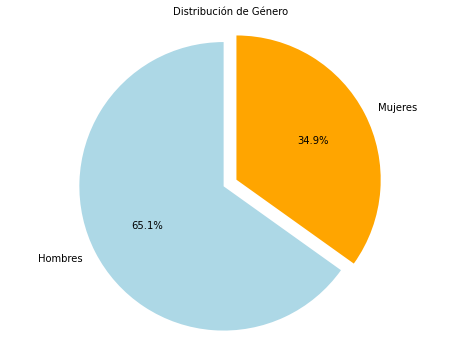

In [7]:
import matplotlib.pyplot as plt

# Contar la cantidad de cada categoría
counts = df['Genero'].value_counts()  # por ejemplo: {'Masculino': 60, 'Femenino': 40}

# Colores personalizados
colors = ['lightblue', 'orange']

# Crear gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(counts, labels = ['Hombres', 'Mujeres'], autopct='%1.1f%%', startangle=90, colors=colors, explode=[0.05,0.05])
plt.title('Distribución de Género', fontsize=10)
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

In [8]:
df.Educacion.value_counts()

Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: Educacion, dtype: int64

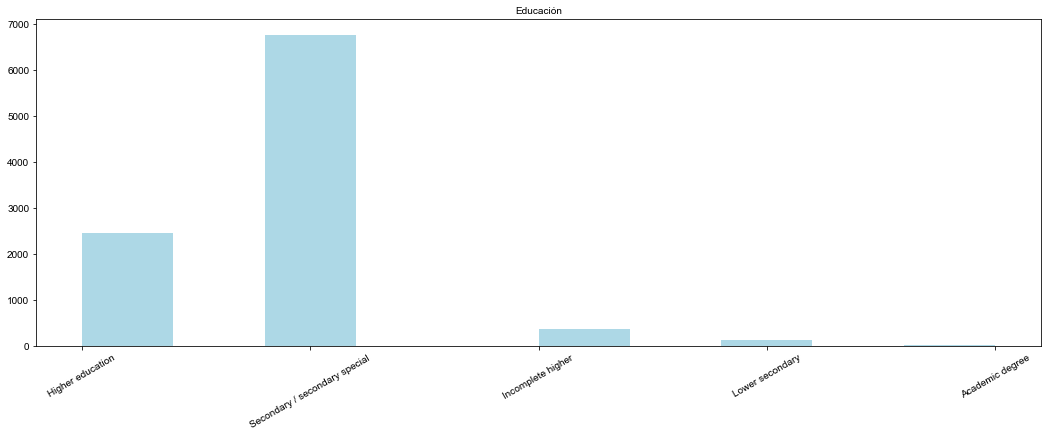

<Figure size 576x396 with 0 Axes>

In [9]:
df['Educacion'].hist(bins=10, color='lightblue') # Vemos graficamente su distribución
plt.title('Educación', fontsize=10)
plt.grid(False)

plt.gcf().set_size_inches(18, 6)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)
plt.xticks(rotation=30) # Para rotar las etiquetas del eje X porque si no se superponen unas con otras.

plt.show()
plt.clf()

In [10]:
df.Hijos.value_counts()

0     6819
1     1886
2      852
3      126
4       18
5        5
19       1
14       1
7        1
Name: Hijos, dtype: int64

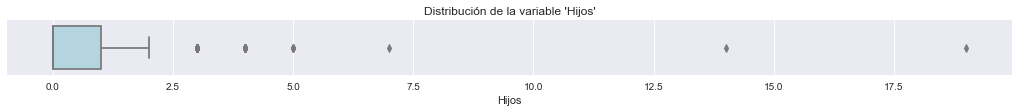

In [11]:
plt.figure(figsize=(18, 1))  
sns.boxplot(x=df['Hijos'], color="lightblue")
plt.title("Distribución de la variable 'Hijos'")
plt.show()

In [12]:
# Para intentar corregir estos valores extremos los reemplazo por otros mas habituales entendiendo que son pocos los outliers.
df.Hijos = df.Hijos.replace([19], 3)
df.Hijos = df.Hijos.replace([14], 2)
df.Hijos = df.Hijos.replace([7], 1)

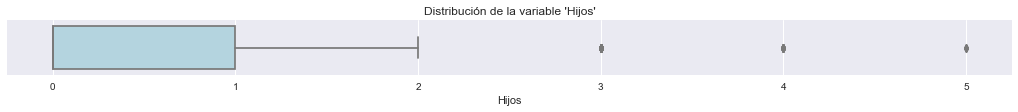

In [13]:
plt.figure(figsize=(18, 1))  
sns.boxplot(x=df['Hijos'], color="lightblue")
plt.title("Distribución de la variable 'Hijos'")
plt.show()

In [14]:
df.Hijos.value_counts()

0    6819
1    1887
2     853
3     127
4      18
5       5
Name: Hijos, dtype: int64

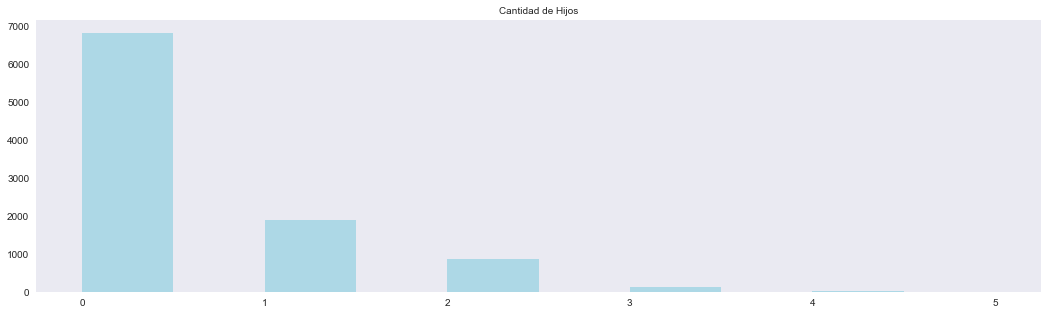

<Figure size 576x396 with 0 Axes>

In [15]:
df['Hijos'].hist(bins=10, color='lightblue') # Vemos graficamente su distribución
plt.title('Cantidad de Hijos', fontsize=10)
plt.grid(False)

plt.gcf().set_size_inches(18, 5)  # Tamaño de la figura (ancho, alto)
plt.style.use('seaborn')  # Cambiar un estilo predefinido de fondo(como 'ggplot', 'seaborn', etc.)

plt.show()
plt.clf()

In [16]:
df.Target.value_counts()

0    8426
1    1283
Name: Target, dtype: int64

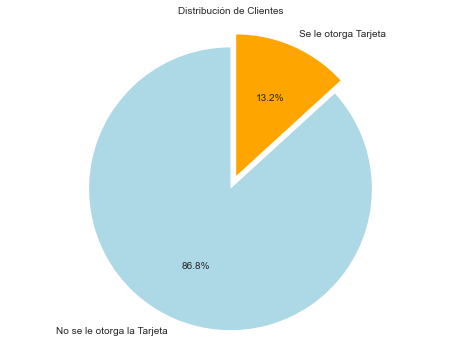

In [17]:
counts = df['Target'].value_counts() 

# Colores personalizados
colors = ['lightblue', 'orange']

# Crear gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(counts, labels = ['No se le otorga la Tarjeta', 'Se le otorga Tarjeta'], autopct='%1.1f%%', startangle=90, colors=colors, explode=[0.05,0.05])
plt.title('Distribución de Clientes', fontsize=10)
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

<div class="alert alert-warning">La variable objetivo es si un cliente recibe o no la tarjeta de crédito:
    

    
- Clase positiva: “Se le otorga tarjeta” → pocos casos.

- Clase negativa: “No se le otorga” → mayoría de casos.
    

Esto genera un desequilibrio fuerte entre clases. Por ejemplo:

- No aprobado	8,000	87%
- Se le otorga tarjeta	1,200	13%

Lo que pasa si no se corrige el desequilibrio, es que como los modelos tienden a predecir siempre la clase mayoritaria (“No aprobado” en este caso) e ignorar la clase que es mas rara, porque eso minimiza el error global, voy a tener resultados como el Accuracy que parece en numeros que es bueno y pero tambien obtendre que no detecta ningun cliente aprobable. Las métricas en esta situación engañan: un modelo que parece exacto en realidad no sirve para detectar clientes que sí podrían obtener la tarjeta.

</div>

In [18]:
df.describe()

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.419302,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.728208,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


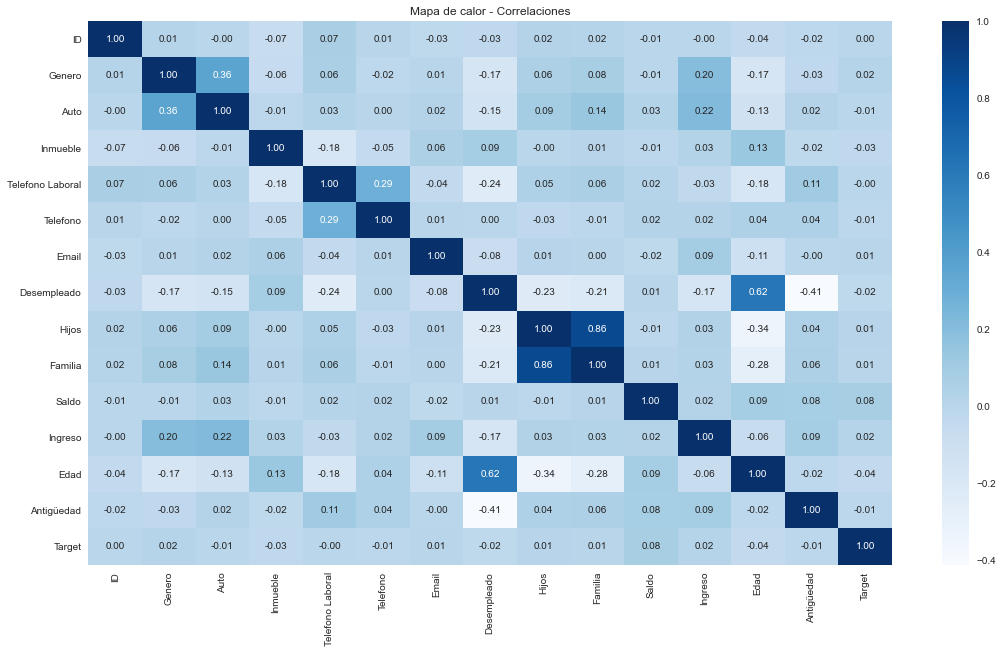

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Mapa de calor - Correlaciones')
plt.show()

## <div style = 'background-color:Lightblue'> <center><font color='white'>② Preparación y limpieza de los datos </font></div>
  
En esta etapa se realiza la preparación del conjunto de datos para el modelado.
El objetivo es garantizar que la información sea coherente, completa y utilizable por los algoritmos de aprendizaje automático.
Se incluyen tareas:
- Tratamiento de valores faltantes.
- Codificación de variables categóricas.
- Escalado o normalización de variables numéricas.    
De este modo, los datos quedarán listos para desarrollar modelos confiables y precisos.

In [20]:
# Chequeo de valores nulos
check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [21]:
df.dtypes

ID                    int64
Genero                int64
Auto                  int64
Inmueble              int64
Telefono Laboral      int64
Telefono              int64
Email                 int64
Desempleado           int64
Hijos                 int64
Familia               int64
Saldo                 int64
Ingreso             float64
Edad                float64
Antigüedad          float64
Tipo de Ingreso      object
Educacion            object
Estado Civil         object
Tipo de Casa         object
Empleo               object
Target                int64
dtype: object

In [22]:
df.sample(3)

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Tipo de Ingreso,Educacion,Estado Civil,Tipo de Casa,Empleo,Target
1406,5028346,0,0,1,1,1,0,0,0,2,8,157500.0,47.979082,5.974113,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0
4349,5066799,0,1,1,0,0,0,0,0,2,10,144000.0,45.282244,1.015763,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0
375,5010981,1,1,0,0,0,0,0,1,3,25,270000.0,41.213714,9.270553,Working,Incomplete higher,Married,House / apartment,Managers,0


In [23]:
# La variable "Edad" y "Antiguedad" presentan valores con decimales, no es muy apropiado usar los con valores representados
# de esa forma, por lo que procedo a convertir a numeros enteros.

In [24]:
df['Edad'] = df['Edad'].round(0).astype(int)
# round(0) para redondear
# astype(int) convierte en enteros asi no quedan decimales
df['Antigüedad'] = df['Antigüedad'].round(0).astype(int)

In [25]:
df['Target'].value_counts()

0    8426
1    1283
Name: Target, dtype: int64

In [26]:
df.head(3)

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Tipo de Ingreso,Educacion,Estado Civil,Tipo de Casa,Empleo,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,33,12,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,59,3,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52,8,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0


In [27]:
# Ver como esta compuesto el campo "Tipo de Ingreso"
df["Tipo de Ingreso"].value_counts()

Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: Tipo de Ingreso, dtype: int64

In [28]:
# Como los valores no tienen un orden de prelación se puede asignaar un valor determinado a cada tipo de observación.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Tipo de Ingreso'] = le.fit_transform(df['Tipo de Ingreso'])

In [29]:
df.head(3)

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Tipo de Ingreso,Educacion,Estado Civil,Tipo de Casa,Empleo,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,33,12,4,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,59,3,4,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52,8,0,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0


In [30]:
# Asi quedaria el campo con valores numéricos.
df["Tipo de Ingreso"].value_counts()

4    4960
0    2312
1    1712
2     722
3       3
Name: Tipo de Ingreso, dtype: int64

Ahora identifico los demas campos que estan como texto y analizo la posibilidad de como pasarlos a expresar en numeros.

In [31]:
# En este caso como es un estudio o analisis economico, la codificación debe ser ordinal (tener un orden de importancia) , 
# porque el nivel educativo tiene un orden lógico: a más educación → más valor numérico.
df["Educacion"].value_counts()

Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: Educacion, dtype: int64

In [32]:
# Mapeo_educacion sera el diccionario a consultar para establecer los valores numéricos.
mapeo_educacion = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

df['Educacion'] = df['Educacion'].map(mapeo_educacion) # En la misma columna pongo los valores expresados en numeros con un orden. 

In [33]:
df.head(3)

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Tipo de Ingreso,Educacion,Estado Civil,Tipo de Casa,Empleo,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,33,12,4,4,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,59,3,4,2,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52,8,0,2,Single / not married,House / apartment,Sales staff,0


In [34]:
# En un análisis de crédito o financiero, el estado civil es muy importante porque suele relacionarse con la estabilidad 
# económica y social, esto puede influir en la probabilidad de pago de los servicios analizados.
# La justificación sobre los valores que asignaré
# Casados (5) → suelen tener ingresos y gastos compartidos, lo que disminuye el riesgo de impago.
# Viudos (4) → suelen ser personas de mayor edad o más estables económicamente.
# Unión civil (3) → hay una estructura familiar, mas informal que los anteriores.
# Separados (2) → pueden atravesar situaciones financieras transitorias por lo que su riesgo aumenta.
# Solteros (1) → ingresos individuales, menor estabilidad familiar, a veces menor tiempo de antigüedad laboral.

df["Estado Civil"].value_counts()

Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: Estado Civil, dtype: int64

In [35]:
mapeo_estado_civil = {
    'Single / not married': 1,
    'Separated': 2,
    'Civil marriage': 3,
    'Widow': 4,
    'Married': 5
}

df['Estado Civil'] = df['Estado Civil'].map(mapeo_estado_civil)

In [36]:
# En este caso voy a numerar un poco de forma arbitraria segun lo que identifico que se interpretaria en una empresa crediticia
# o en un analisis de scoring bancario.
# Rented y Whit parents tendrían el menor valor, y luego va subiendo segun considero tiene mejor valoración crediticia.

df["Tipo de Casa"].value_counts()

House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: Tipo de Casa, dtype: int64

In [37]:
mapeo_Tipo_de_Casa = {
    'Rented apartment': 1,
    'With parents': 1,
    'Co-op apartment': 2,
    'Municipal apartment': 2,
    'House / apartment': 3,
    'Office apartment': 3
}

df['Tipo de Casa'] = df['Tipo de Casa'].map(mapeo_Tipo_de_Casa)

In [38]:
# En este caso igual, hay un orden que se puede establecer en los tipos de trabajo, desde los de menor ingreso y estabilidad
# hasta los de mayor ingresos, estabilidad y por ende mas aptos para servicios crediticios.
# 6 (Valor mas alto): son para cargos jerárquicos o profesionales técnicos.
# 5 (Profesionales/administrativos): formación profesional, sueldos medios-altos.
# 4 (Empleados comunes): estabilidad laboral media.
# 3 (Servicios personales): ingresos bajos/medios o irregulares ni tan estables.
# 2 (Trabajos manuales no calificados): trabajo físico, bajo ingreso.
# 1 (Muy baja calificación): tienen una alta rotación y con una alta vulnerabilidad económica.

df["Empleo"].value_counts()

Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                   623
High skill tech staff     357
Accountants               300
Medicine staff            291
Cooking staff             193
Security staff            182
Cleaning staff            146
Private service staff      86
Low-skill Laborers         53
Secretaries                46
Waiters/barmen staff       40
HR staff                   22
IT staff                   18
Realty agents              16
Name: Empleo, dtype: int64

In [39]:
mapeo_ocupacion = {
    'Low-skill Laborers': 1,
    'Laborers': 2,
    'Cleaning staff': 3,
    'Private service staff': 3,
    'Waiters/barmen staff': 3,
    'Security staff': 3,
    'Cooking staff': 3,
    'Drivers': 4,
    'Sales staff': 4,
    'Core staff': 4,
    'Accountants': 5,
    'Medicine staff': 5,
    'Secretaries': 5,
    'HR staff': 5,
    'IT staff': 5,
    'Managers': 6,
    'High skill tech staff': 6,
    'Realty agents': 6,
    'Other': 3
}

df['Empleo'] = df['Empleo'].map(mapeo_ocupacion)

In [40]:
# Con esto queda modificado y limpio todo el set de datos, todas los campos con textos fueron reemplazados por numéricos.
df.head(7)

,ID,Genero,Auto,Inmueble,Telefono Laboral,Telefono,Email,Desempleado,Hijos,Familia,Saldo,Ingreso,Edad,Antigüedad,Tipo de Ingreso,Educacion,Estado Civil,Tipo de Casa,Empleo,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,33,12,4,4,3,1,3,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,59,3,4,2,5,3,3,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52,8,0,2,1,3,4,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,62,0,1,4,2,3,3,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46,2,4,4,5,3,5,0
5,5008819,1,1,1,0,0,0,0,0,2,17,135000.0,49,3,0,2,5,3,2,0
6,5008825,0,1,0,0,0,0,0,0,2,25,130500.0,29,3,4,3,5,3,5,1


## <div style = 'background-color:Orangered'> <center><font color='white'>③ Modelado y evaluación </font></div>
  
Aca aplicaré 3 modelos de clasificación para determinar si un cliente X puede ser o no aprobado para un producto financiero.

Modelos a usar:

- Regresión Logística (modelo clásico en el análisis de scoring crediticio, es el mas aceptado generalmente)
- Random Forest (mas robusto y con mejor balance entre potencia e interpretabilidad)
- XGBoost (Es el más preciso pero no tan interpretable)

Se evalúan utilizando métricas como:

- Accuracy (% de predicciones correctas sobre el total de los casos)
- Recall (Mide cuantos clientes que podrían ser aprobados fueron correctamente detectados).
- Auc (Mide como el modelo es capas de diferenciar entre aprobados y no aprobados, que tan bien los ordena de un lado y del otro).

## ❑ Regresión Logística

Primero antes que nada hay que escalar variables, ya que por ejemplo "edad" está en un rango de entre 0 a 100, "ingreso" tiene rangos mayores por ejemplo de 10.000 hasta 1.000.000 y "educacion" tiene valores de 0 a 4. Por esta causa al escalar las variables se previene que alguna de estas, sobretodo los valores muy grandes dominen el modelo solo por su escala. En definitiva transforma los valores para que tengan una media cero y DS (Desviación Estandar) de 1.
Sin escalar, algunas variables podrían parecer menos importantes de lo que realmente son, solo por tener un rango más pequeño.

In [41]:
columnas = ['Edad', 'Ingreso', 'Hijos', 'Desempleado', 'Inmueble', 'Auto', 'Educacion', 'Estado Civil', 'Tipo de Casa', 'Empleo']

In [42]:
X = df[columnas]    
y = df['Target']

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Como comenté al comienzo del análisis, hay un desbalance puesto que los aprobados son pocos por lo que puede distorcionar los resultados, 
por esto hay que balancear las clases

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', random_state=42) # Aqui balanceo las clases

In [45]:
# Acá estoy ajustando el umbral de decisión que por defecto el modelo usa 0.5. Al bajar a 0.3 mas obvservaciones se clasifican como 1.
y_prob = lr.predict_proba(X_test)[:, 1]
threshold = 0.3  
y_pred = (y_prob >= threshold).astype(int)

NameError: name 'X_test' is not defined

In [ ]:
y_prob = predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print()
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

labels = np.array([["Verdaderos Negativos = {}".format(cm[0,0]), "Falsos Positivos = {}".format(cm[0,1])],
                   ["Falso Negativos = {}".format(cm[1,0]), "Verdaderos Positivos = {}".format(cm[1,1])]])

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)

plt.title('Matriz de Confusión modelo Logístico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')

# Mostrar el gráfico
plt.show()

<div class="alert alert-warning">Aunque la regresión logística ya está optimizada (con escalado de variables, umbral ajustado y balanceo de clases), los valores de AUC y recall siguen siendo bajos. Dado que busco mejorar la capacidad predictiva, incluso a costa de perder algo de interpretabilidad, optaré por probar otros algoritmos más complejos para continuar el análisis</div>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Supongamos que df ya tiene tus variables numéricas codificadas y la columna objetivo 'Approved'
# df = pd.read_csv('datos_clientes.csv')

# Variables predictoras
X = df[['Educacion', 'Estado Civil', 'Tipo de Casa', 'Empleo']]
y = df['Target']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar variables para regresión logística (opcional pero recomendable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1️⃣ Regresión Logística
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]

# 2️⃣ Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# 3️⃣ XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

# Función para mostrar métricas
def mostrar_metricas(y_true, y_pred, y_prob, modelo):
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    print(f"{modelo}: Accuracy={acc:.3f}, Recall={rec:.3f}, AUC={auc:.3f}")

# Mostrar métricas de los tres modelos
mostrar_metricas(y_test, y_pred_lr, y_prob_lr, "Regresión Logística")
mostrar_metricas(y_test, y_pred_rf, y_prob_rf, "Random Forest")
mostrar_metricas(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")